In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from jaxtyping import Float

(<Figure size 800x800 with 2 Axes>,
 <Axes: title={'center': '$n \\times n \\times 4$ Tensor Heatmap'}>)

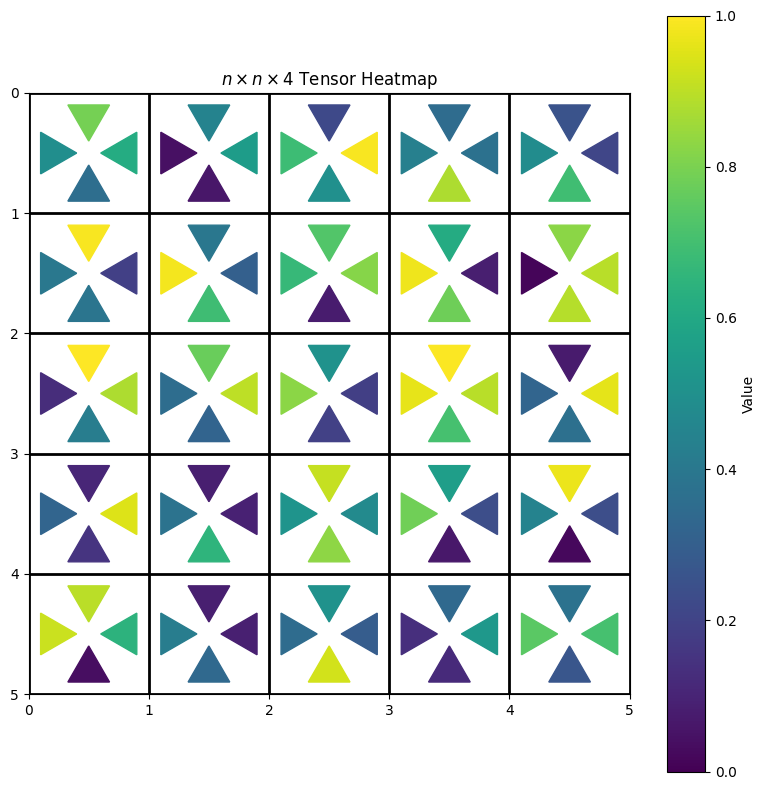

In [6]:

DEFAULT_KWARGS: dict = dict(
    numVertices=3,
    radius=0.2,
)
OFFSET_STEP: float = 0.2

PATCHES_KWARGS: list[dict] = [
    {'xy_offset': (0.5, 1-OFFSET_STEP), 'orientation': np.pi, **DEFAULT_KWARGS},
    {'xy_offset': (0.5, OFFSET_STEP), 'orientation': 0, **DEFAULT_KWARGS},
    {'xy_offset': (OFFSET_STEP, 0.5), 'orientation': -np.pi/2, **DEFAULT_KWARGS},
    {'xy_offset': (1-OFFSET_STEP, 0.5), 'orientation': np.pi/2, **DEFAULT_KWARGS},
    # {'xy_offset': (0.5, 1-OFFSET_STEP), 'orientation': 0, **DEFAULT_KWARGS},
    # {'xy_offset': (0.5, OFFSET_STEP), 'orientation': np.pi, **DEFAULT_KWARGS},
    # {'xy_offset': (OFFSET_STEP, 0.5), 'orientation': np.pi/2, **DEFAULT_KWARGS},
    # {'xy_offset': (1-OFFSET_STEP, 0.5), 'orientation': -np.pi/2, **DEFAULT_KWARGS},
]


def plot_tensor_heatmap(data: Float[np.ndarray, "n n 4"], cmap: str = 'viridis') -> None:
    n: int = data.shape[0]
    assert data.shape == (n, n, 4), f"Expected shape (n, n, 4), got {data.shape}"
    fig, ax = plt.subplots(figsize=(8, 8))
	
    # Normalizing the data for color mapping
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    
    for i in range(n):
        for j in range(n):
            cell_data = data[i, j]
            
            # Create triangular patches for each direction
            for k, kwargs in enumerate(PATCHES_KWARGS):
                ax.add_patch(
					patches.RegularPolygon(
						(j+kwargs['xy_offset'][0], i+kwargs['xy_offset'][1]),
                        kwargs['numVertices'], 
                        radius=kwargs['radius'], 
                        orientation=kwargs['orientation'], 
                        color=cmap(cell_data[k])
                    )
                )
    
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.invert_yaxis()
    ax.set_xticks(np.arange(0, n+1, 1))
    ax.set_yticks(np.arange(0, n+1, 1))
    # ax.grid(True, color='white', linewidth=2)
    ax.grid(True, color='black', linewidth=2)
    ax.set_aspect('equal')
    
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=ax, label='Value')
    plt.title(r'$n \times n \times 4$ Tensor Heatmap')
    plt.tight_layout()

    return fig, ax
    

# Plot the tensor heatmap
plot_tensor_heatmap(data = np.random.rand(5, 5, 4))

(<Figure size 800x800 with 2 Axes>, <Axes: >)

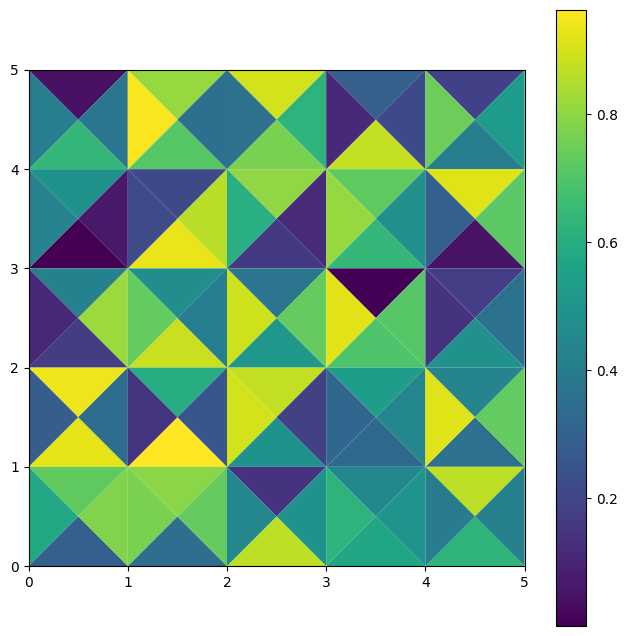

In [49]:


def plot_directional_heatmap(data: Float[np.ndarray, "n n 4"], cmap: str = "viridis"):
    n: int = data.shape[0]
    assert data.shape == (n, n, 4), f"Expected shape (n, n, 4), got {data.shape}"
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Normalizing the data for color mapping
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    
    kwargs: dict = dict(
        closed=True,
        linewidth=0,
    )

    # Define the corners of each square
    for i in range(n):
        for j in range(n):
            # Coordinates for the center and corners
            center: tuple[float, float] = (j + 0.5, n - i - 0.5)
            top_left: tuple[float, float] = (j, n - i)
            top_right: tuple[float, float] = (j + 1, n - i)
            bottom_left: tuple[float, float] = (j, n - i - 1)
            bottom_right: tuple[float, float] = (j + 1, n - i - 1)
            
            # Create triangles for each direction
            # Up
            ax.add_patch(patches.Polygon(
                [center, top_left, top_right], 
                color=cmap(norm(data[i, j, 0])),
                **kwargs,
            ))
            # Down
            ax.add_patch(patches.Polygon(
                [center, bottom_left, bottom_right],
                color=cmap(norm(data[i, j, 1])),
                **kwargs,
            ))
            # Left
            ax.add_patch(patches.Polygon(
                [center, top_left, bottom_left],
                color=cmap(norm(data[i, j, 2])),
                **kwargs,
            ))
            # Right
            ax.add_patch(patches.Polygon(
                [center, top_right, bottom_right],
                color=cmap(norm(data[i, j, 3])),
                **kwargs,
            ))

    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect('equal')
    # ax.axis('off')
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical')
    
    return fig, ax

# Plot the data
plot_directional_heatmap(data = np.random.rand(5, 5, 4))
